In [ ]:
%matplotlib inline

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/model/ml_rgr.ipynb)

[![View Source on GitHub](https://img.shields.io/badge/github-view%20source-black.svg)](https://github.com/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/model/ml_rgr.ipynb)

## Building Machine learning models for regression

This notebook shows how to build machine leanring models for a regression problem.

In [ ]:
try:
    import ai4water
except (ImportError, ModuleNotFoundError):
    !pip install ai4water[ml]

In [15]:
import site
site.addsitedir("D:\\mytools\\AI4Water")


from ai4water import Model
from ai4water.datasets import MtropicsLaos
from ai4water.utils.utils import get_version_info


In [16]:


for k,v in get_version_info().items():
    print(f"{k} version: {v}")

python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os version: nt
ai4water version: 1.07
lightgbm version: 3.3.1
tcn version: 3.4.0
catboost version: 0.26
xgboost version: 1.5.0
easy_mpl version: 0.21.3
SeqMetrics version: 1.3.3
tensorflow version: 2.7.0
keras.api._v2.keras version: 2.7.0
numpy version: 1.21.0
pandas version: 1.3.4
matplotlib version: 3.4.3
h5py version: 3.5.0
sklearn version: 1.0.1
shapefile version: 2.3.0
fiona version: 1.8.22
xarray version: 0.20.1
netCDF4 version: 1.5.7
optuna version: 2.10.1
skopt version: 0.9.0
hyperopt version: 0.2.7
plotly version: 5.3.1
lime version: NotDefined
seaborn version: 0.11.2


In [18]:


dataset = MtropicsLaos(save_as_nc=True,  # if set to True, then netcdf must be installed
                       convert_to_csv=False,
                       path="F:\\data\\MtropicsLaos",  # path where the data is saved
                      )

data = dataset.make_regression(lookback_steps=1)
data.shape


    Not downloading the data since the directory 
    F:\data\MtropicsLaos already exists.
    Use overwrite=True to remove previously saved files and download again


Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


(258, 9)

### Random Forest

In [19]:
model = Model(model="RandomForestRegressor")


            building ML model for  
            regression problem using RandomForestRegressor


#### Training

In [20]:

model.fit(data=data)

***** Training *****
input_x shape:  (144, 8)
target shape:  (144, 1)


RandomForestRegressor(random_state=313)

In [21]:
model.fit_on_all_training_data(data=data)

***** Training *****
input_x shape:  (144, 8)
target shape:  (144, 1)
***** Validation *****
input_x shape:  (36, 8)
target shape:  (36, 1)


RandomForestRegressor(random_state=313)

In [22]:
x, y = model.training_data()

output = model.fit(x=x, y=y)

***** Training *****
input_x shape:  (144, 8)
target shape:  (144, 1)


In [23]:
type(output)

sklearn.ensemble._forest.RandomForestRegressor

#### Prediction

Once the model is trained, we can make predictions from it.

***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


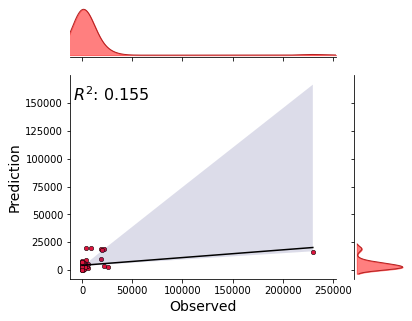

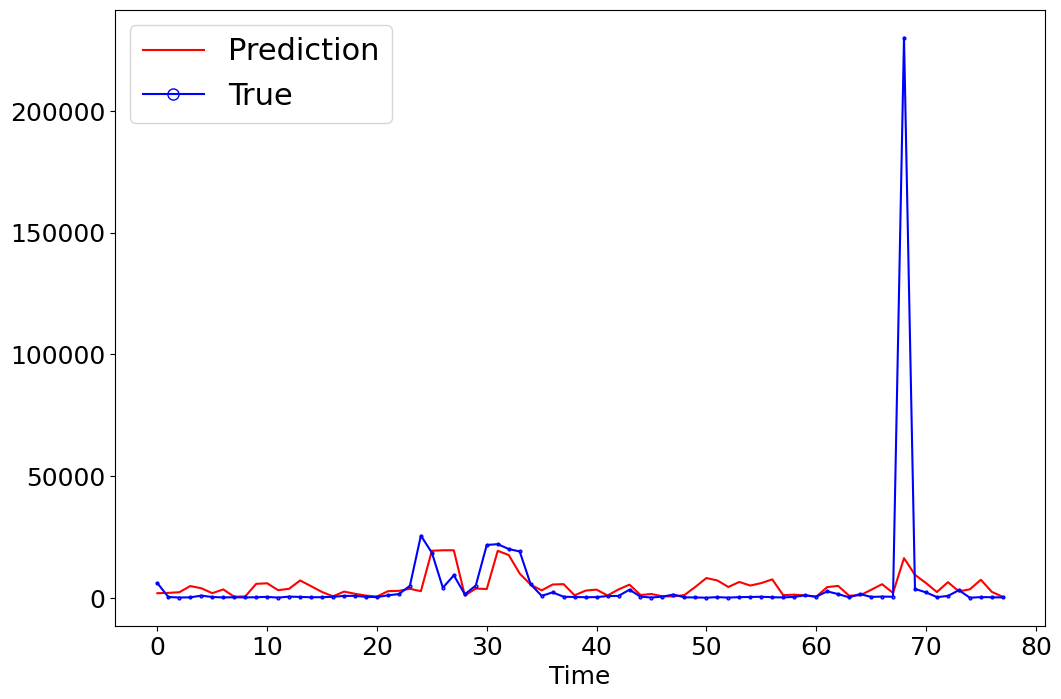

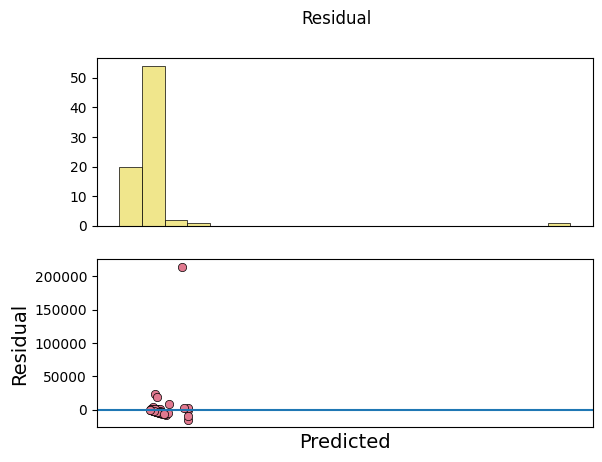

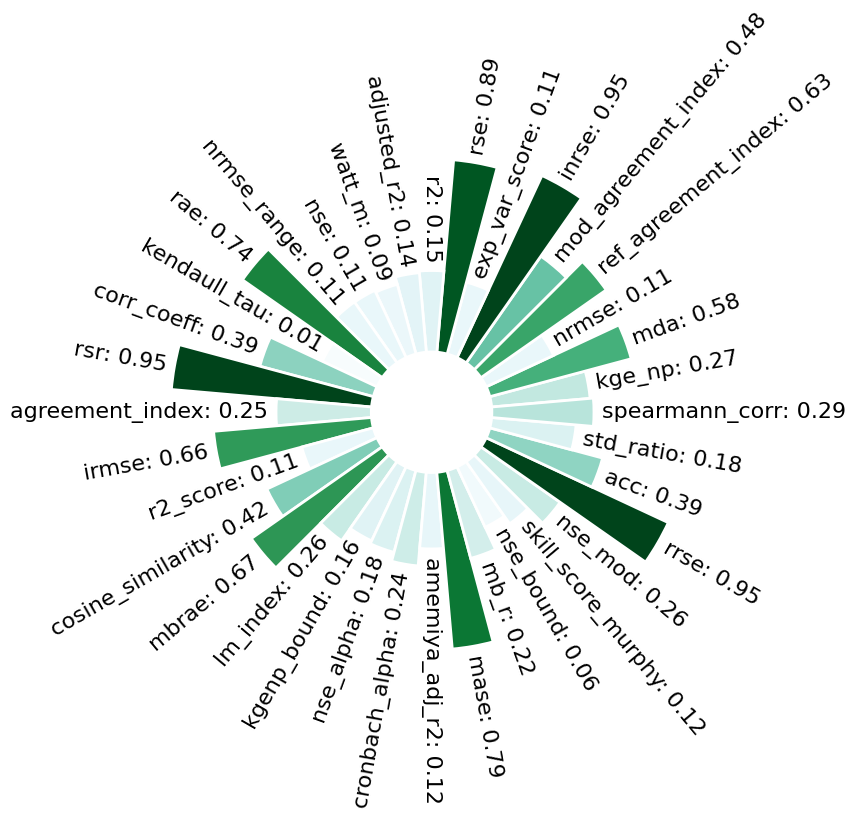

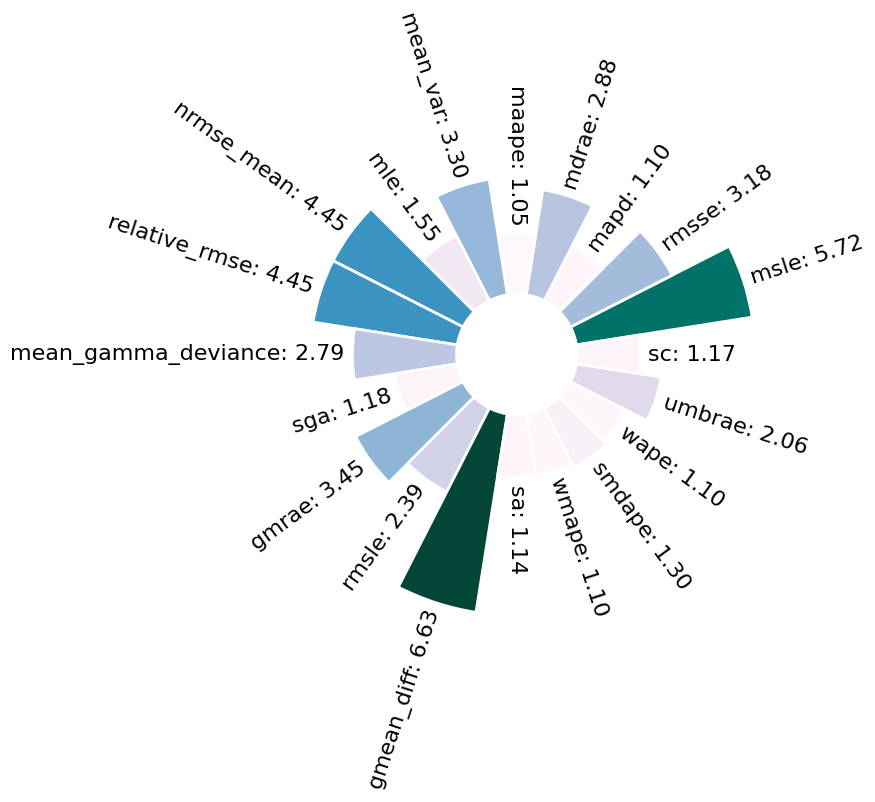

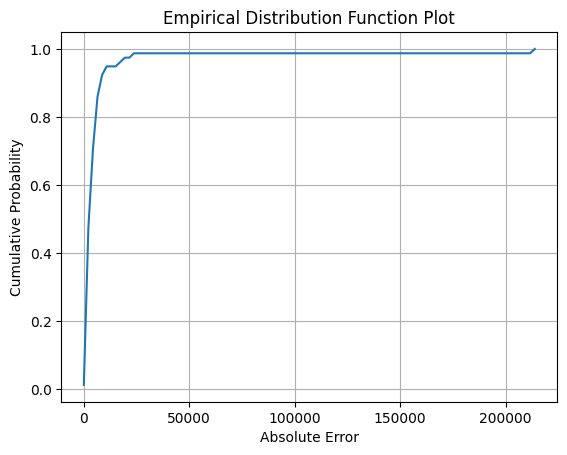

In [24]:
_ = model.predict(data=data)

In [17]:
_ = model.predict(data=data, process_results=False)

***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


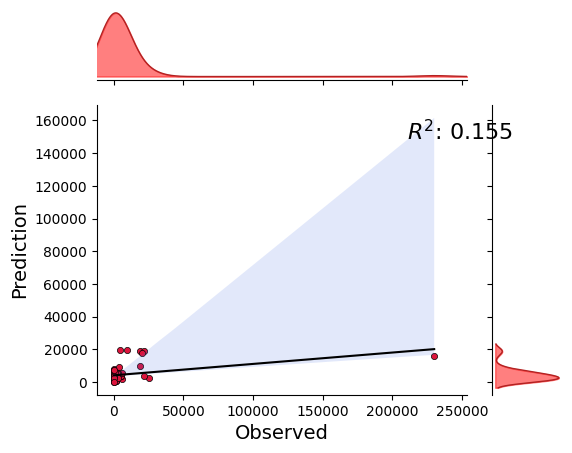

In [18]:
_ = model.predict(data=data, plots=["regression"])

In [25]:
t,p = model.predict(data=data, process_results=False, return_true=True)
t.shape, p.shape

***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


((78, 1), (78,))

***** Training *****
input_x shape:  (144, 8)
target shape:  (144, 1)


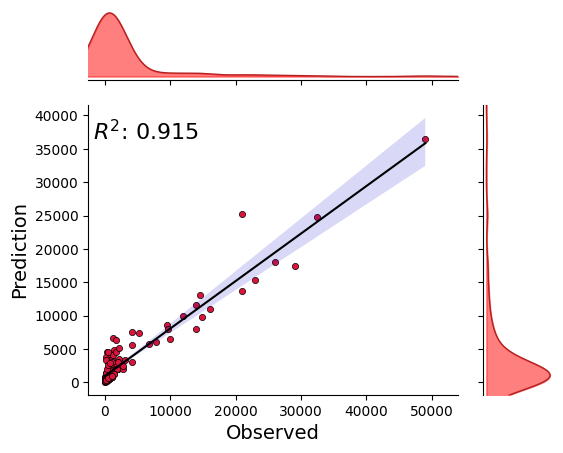

In [26]:
_ = model.predict_on_training_data(data=data, plots=["regression"])

#### Evaluation

In [27]:
model.evaluate(data=data)

***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


0.1064417278288089

In [28]:
model.evaluate(data=data, metrics=["r2", "r2_score", "rmse"])

***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


{'r2': 0.15480087060681375,
 'r2_score': 0.1064417278288089,
 'rmse': 24752.12321159926}

In [29]:
model.evaluate_on_test_data(data=data, metrics=["r2", "r2_score", "rmse"])

***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


{'r2': 0.15480087060681375,
 'r2_score': 0.1064417278288089,
 'rmse': 24752.12321159926}

In [30]:
model.evaluate_on_training_data(data=data, metrics=["r2", "r2_score", "rmse"])

***** Training *****
input_x shape:  (144, 8)
target shape:  (144, 1)


{'r2': 0.9148494793552957,
 'r2_score': 0.8699813684402202,
 'rmse': 2495.2543044816152}

In [31]:
model.evaluate(x=x, y=y, metrics=["r2", "r2_score", "rmse"])

{'r2': 0.9148494793552957,
 'r2_score': 0.8699813684402202,
 'rmse': 2495.2543044816152}

In [36]:
model = Model(model={"RandomForestRegressor": {"n_estimators": 200}})



            building ML model for  
            regression problem using RandomForestRegressor


In [37]:
model.fit(data=data)
model.evaluate_on_test_data(data=data, metrics=["r2", "r2_score", "rmse"])

***** Training *****
input_x shape:  (144, 8)
target shape:  (144, 1)
***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


{'r2': 0.17442335408602663,
 'r2_score': 0.11857515027421384,
 'rmse': 24583.497124708025}

### XGBoost

In [38]:
model = Model(model={"XGBRegressor": {"learning_rate": 0.01}})


            building ML model for  
            regression problem using XGBRegressor


In [39]:
model.fit(data=data)
model.evaluate_on_test_data(data=data, metrics=["r2", "r2_score", "rmse"])

***** Training *****
input_x shape:  (144, 8)
target shape:  (144, 1)
***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


{'r2': 0.006633469985602984,
 'r2_score': -0.016195787844924148,
 'rmse': 26396.0968745532}

### Cat Boost

In [42]:
model = Model(model={"CatBoostRegressor": {"learning_rate": 0.01}}, verbosity=0)

In [43]:
model.fit(data=data)
model.evaluate_on_test_data(data=data, metrics=["r2", "r2_score", "rmse"])

{'r2': 0.14617658996808958,
 'r2_score': 0.07440578685241073,
 'rmse': 25191.923784722494}

### Light Graient Boost Machine

In [44]:
model = Model(model={"LGBMRegressor": {"num_leaves": 45}})


            building ML model for  
            regression problem using LGBMRegressor


In [45]:
model.fit(data=data)
model.evaluate_on_test_data(data=data, metrics=["r2", "r2_score", "rmse"])

***** Training *****
input_x shape:  (144, 8)
target shape:  (144, 1)
***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


{'r2': 0.0028383594363326804,
 'r2_score': -0.01702525035421454,
 'rmse': 26406.86748933602}

In [7]:
model._model

LGBMRegressor(num_leaves=45, random_state=313)

### Custom model/estimator/algorithm



#### uninitiated

In [9]:
from sklearn.ensemble import RandomForestRegressor

class MyRF(RandomForestRegressor):
    pass


model = Model(model=MyRF,
              ts_args={'lookback': 1},
              mode="regression")


            building ML model for  
            regression problem using <class '__main__.MyRF'>


#### uninitiated with arguments

In [10]:
model = Model(model={MyRF: {"n_estimators": 10}},
              ts_args={'lookback': 1},
              mode="regression")


            building ML model for  
            regression problem using <class '__main__.MyRF'>


#### initiated

In [ ]:
model = Model(model=MyRF(), mode="regression")